# RNN(再帰型ニューラルネットワーク）

時系列データに対応可能なニューラルネットワークの構造をRNNという。

### RNNの構造
前層の出力が次の層の入力として再帰的に入力される構造を持つ
前の層の状態を次の層の入力として使用することで、時系列的なデータにも対応できるようになっている。\
時系列データでは初期の状態と過去の時間$t-1$の状態から次の時間$t$を再帰的に求める構造が必要であり、RNNはその構造を満たしている。

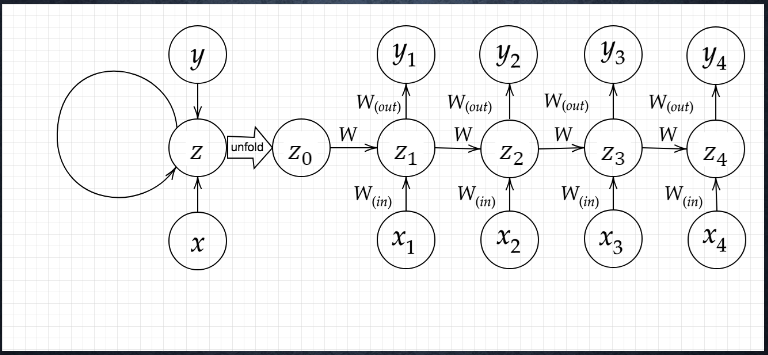

$$
 z_1 = W_{in}x_1 + W z_0 + b \\
 z_2 = W_{in}x_2 + W z_1 + b \\
 \vdots
$$

### BPTT
RNNのパラメータ調整方法、誤差逆伝搬の一種。
BackPropagation Through Timeの略

時刻$t$の計算は次のようになる。
関数$f, g$は活性化関数。

$$
 u^t = W_{(in)} x^t + W z^{t-1} + b \\
 z^t = f(W_{(in)} x^t + W z^{t-1} + b) \\
 v^t = W_{(out)} z^t + c \\
 y^t = g(W_{(out)} z^t + c)
$$

パラメータを求めるためには、それぞれのパラメータに対する誤差の勾配、

$$
 \frac{\partial E}{\partial W_{in}},\ \ \frac{\partial E}{\partial W_{out}}, \frac{\partial E}{\partial W}
$$

を求める必要がある。

$$
 \frac{\partial E}{\partial W_{in}} = \frac{\partial E}{\partial u^t} \left[ \frac{\partial u^t}{\partial W_{in}} \right]^T = \delta^t [x^t]^T
$$

$$
 \frac{\partial E}{\partial W_{out}} = \frac{\partial E}{\partial v^t} \left[ \frac{\partial v^t}{\partial W_{out}} \right]^T = \delta^{out, t} [z^t]^T
$$

$$
 \frac{\partial E}{\partial W_{out}} = \frac{\partial E}{\partial u^t} \left[ \frac{\partial u^t}{\partial W} \right]^T = \delta^{t} [z^{t-1}]^T
$$

$T$は転置ではなく、すべての時間について計算することを意味する。

$$
 \frac{\partial E}{\partial u_{t}} = \frac{\partial E}{\partial v^t} \frac{\partial v^t}{\partial u^t} = f^{'}(u^t) W_{out} \delta^{out, t} = \delta^t
$$

$$
 \delta^{t-1} = \delta^t \left\{ W f'(u^{t-1}) \right\}
$$

$$
 \delta^{t-z-1} = \delta^{t-z} \left\{ W f'(u^{t-z-1}) \right\}
$$

### BPTTのパラメータ更新式

$$
W^{t+1}_{in} = W^{t}_{in} - \epsilon \frac{\partial E}{\partial W_{in}} = W^t_{in} - \epsilon \sum^{T_t}_{z=0} \delta^{t-z} [x^{t-z}]^T
$$

$$
W^{t+1}_{out} = W^{t}_{out} - \epsilon \frac{\partial E}{\partial W_{out}} = W^t_{out} - \epsilon \delta^{out, t} [z^{t}]^T
$$

$$
W^{t+1} = W^{t} - \epsilon \frac{\partial E}{\partial W_{in}} = W^t_{in} - \epsilon \sum^{T_t}_{z=0} \delta^{t-z} [x^{t-z-1}]^T
$$

# LSTM

通常のRNNだと時系列が長くなるにつれて勾配消失が発生し、パラメータの更新がうまくいかず最適地に収束しなくなる。勾配消失への対策としてRNNの構造を変えたものがLSTM

### 勾配爆発

RNNや深いモデルでは勾配消失だけでなく、勾配が誤差逆伝搬するごとに指数関数的に大きくなっていく現象もある。勾配爆発への対策として、クリッピングという手法がある。

- クリッピング\
勾配のノルムが閾値を超えたら勾配のノルムを閾値に正規化する手法

## LSTMの特徴
- ###  CEC

LSTMで過去の情報を記憶しておく部分。
勾配消失、勾配爆発の解決法として、CECの部分の勾配が1になっている。\
入力データについて重みが一律であるため、ニューラルネットで学習されない。
- ### 入力ゲート、出力ゲート

入力ゲートはCECに現在時刻の入力をどれだけ記憶させるかを決めるゲート（シグモイド関数が使われ、入力値をどれだけの割合で使用するかを決める）\
出力ゲートはCECからの出力値（厳密にはtanhに入力した値）をどれだけその時刻の出力とするのかを決める。\
これらのゲートによりCECの学習されない問題を解決する。

- ### 忘却ゲート

忘却ゲートは過去の情報をどれだけ忘れるか、その割合を決めるゲート。シグモイド関数が使われる

- ### 覗き穴結合

CECの値を任意のタイミングで各ゲートに伝搬させたり、忘却させたりするための構造

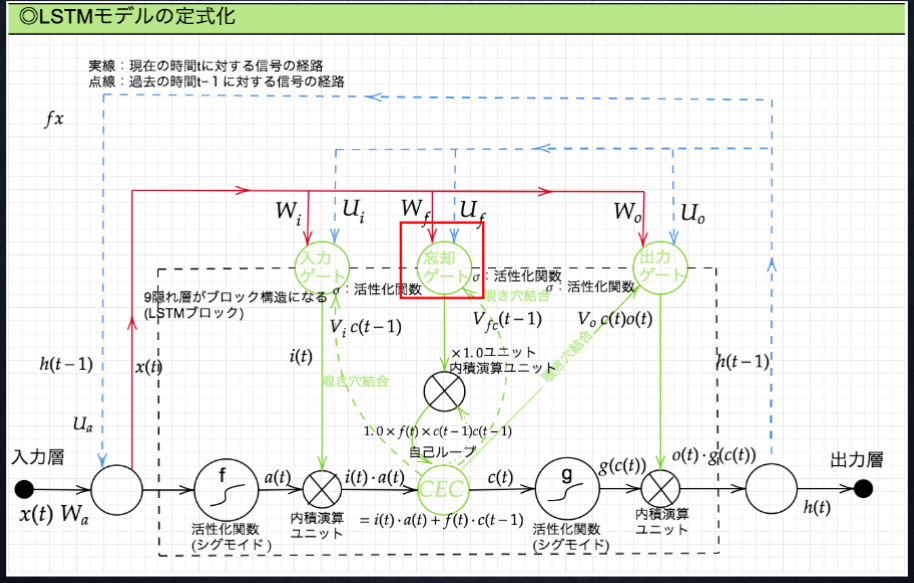

## GRU

LSTMはパラメータの数が多く、計算負荷が高い。パラメータの数を少なくし、同等の精度を実現する構造がGRU\
LSTMとは異なり、リセットゲートと更新ゲートの二つになっている。

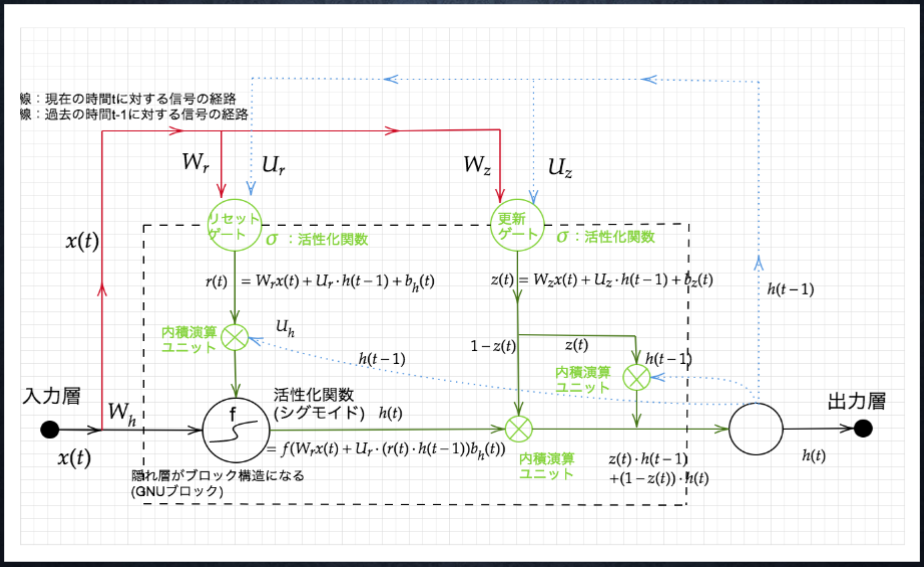

## 双方向RNN

過去の情報だけでなく、未来の情報を加味して精度を向上させるモデル。前後の文脈で意味を推測する必要のある、文章の推敲や、機械翻訳などで用いられる。

## 自然言語処理（Seq2Seq）

機械翻訳などに使われる、Encoder-Decoder二つのRNNからなるモデル。
Encoderで文章の意味を抽出し、Decoderで別の言語に翻訳する。

### Encoder RNN

ユーザーがインプットしたテキストデータを単語ごとに区切ってRNNの入力とする。

①文章を単語などのトークンごとに分割して、ID毎に分割する\
②IDからそのトークンの意味を表す分散表現ベクトルを得る（Embedding)\
③分散ベクトルをRNNに入力していく。\
④最初の分散ベクトルvec1を入力し、hidden_stateを出力（h1)。次にvec2とh1をRNNに入力し、hidden_stateを得る。\
⑤最後のベクトルを入力したときに得られるhidden_stateがfinal stateとなり、入力した文章の意味を表すベクトルになる（thought vector)

### Decoder RNN

単語などのトークンごとにデータを出力する構造

①Encoder RNNのfinal stateから各Tokenの生成確立を出力する。final stateをinitial stateとして入力\
②生成確率をもとにランダムにTokenを選択\
③２で選ばれたTokneをEmbeddingして次のRNNの入力にする。\
④得られたTokenを文字列に変換する

### HRED

Seq2Seqの課題として、一問一答しかできない点がある。そのため会話の文脈が無視される応答になる。
HREDでは過去n-1個の発話から次の発話を生成するため、前の会話の流れに即して応答されるのでより人間らしい文章が生成される。

構造はSeq2Seq＋Context RNNという構造。\
Context RNNはEncoderのまとめた各文章の系列をまとめて会話コンテキスト全体を表すベクトルに変換する構造。過去の会話履歴を加味した返答ができる。

HREDの課題 \
⇒解答に多様性がなくなる。短いよくある答えを選ぶ傾向にある。
⇒解決策としてVHREDが考えられた

### VHRED

HREDにVAEの潜在変数の概念を追加したもの。

## VAE(Variational Autoencoder)

### オートエンコーダ

教師なし学習の一つ、訓練データのみを使用し教師データを使わずに学習する。\
MNISTの場合、数字の画像を入れて同じ画像を出力するニューラルネットワーク

潜在変数という概念が導入されている。\
入力データを潜在変数$z$に変換するニューラルネットをEncoder。潜在変数$z$を入力として元の画像を復元するニューラルネットがDecoder。EncoderとDecoderで構成される。

$z$の次元がデータよりも小さい場合、次元削減としてみなすことができ、オートエンコーダのメリット

### VAE

通常のオートエンコーダの場合、$z$の構造がどのようなものかわからない。（もとのデータの近さなどがわかない変換がかかっていてもわからない。エンコーダでは元のデータが近い場合は変換後のベクトルも近いことが望ましい）\
それを改善するためにVAEでは潜在変数に確率分布$N(0,1)$を仮定する。

## word2vec

文章から使われている単語をリストアップし、IDを付与する。
単語自体はOne-hotベクトルを作ることでラベル付けできるが、単語数が多くなるととても大きいベクトルになる。word2vecでは、任意の固定長ベクトルに変換する重み行列により単語を示すOne-hotベクトルを固定長のベクトルに変換する。

## Attention Mechanism

seq2seqでは長い文章への対応が難しい。seq2seqのEncoderの出力は固定長であるために、長い文章も短い文章も同じ固定長に出力しなければならない。どんなに文章が長くても固定長のベクトルに押し込む必要があり必要な情報が抜け落ちる可能性があった。\
解決策として、入力と出力の単語の関連度を学習することで、長い文章でもそのなかで重要な単語を学習できるようになった。
これにより、翻訳精度が飛躍的に向上した

## 確認テスト

①$5 \times 5$の入力画像をサイズ$3\times3$のフィルタで畳み込んだ時の出力画像のサイズを答えよ。\
ストライドは2, パディングは1とする。

$$
 OH = \frac{5 + 2 \times 1 - 3}{2} + 1 = 3
$$

より、$3 \times 3$

②RNNのネットワークの重みを3つ答えよ\
1: 入力から中間層を定義する重み\
2: 中間層から出力を定義するときの重み\
3: 前の中間層から現在の中間層への重み\

③シグモイド関数の導関数が0を入力とするときその値を選べ
⇒(2) 0.25

④文章中の単語の予測において、文中でなくなっても影響がない単語がある。このような場合どのようなゲートが作用するか\
⇒忘却ゲート

⑤LSTMとCECが抱える課題\
⇒パラメータの数が多く、計算負荷が高い。
⇒勾配を１にするため、CECに学習能力がなく、入力ゲートと出力ゲートを配置する必要があるためにパラメータが増えた

⑥LSTMとGRUの違い\
⇒LSTMはCECとそれに付随する入力ゲート、出力ゲート、忘却ゲートを持ち、パラメータが多く計算コストが高い。一方でGRUはリセットゲートと更新ゲートの二つで、パラメータがLSTMに比べて少なく、精度は同等以上となっている。

⑦Seq2Seqの説明として正しいものを選べ\
⇒②RNNを用いたEncoder-Decoderモデルの一種。

⑧Seq2SeqとHRED,HREDとVHREDの違いを述べよ\
⇒Seq2SeqとHREDの違いは、HREDはSeq2Seqでは加味できない文脈を出力に反映できる\
⇒HREDとVHREDの違いは、VHREDはVAEの潜在変数の概念を導入することでHREDの課題である回答の多様性を実現している。

⑨VAEに関する説明文を完成させよ\
⇒自己符号化器の潜在変数に確率分布を導入したもの

⑩RNNとword2vecの違い
⇒RNNは時系列を学習するのに適した手法。word2vecは単語の分散ベクトルを得る手法\
seq2seqとAttentionの違い\
⇒時系列データから別の時系列データを得る手法。時系列データについてそれぞれの関連度を見つける手法。

## 実装演習

### バイナリ加算の実装（RNN)
0~255までのバイナリ加算をRNNで学習させる。
学習の後半では加算がうまく学習できていることがわかる。

iters:0
Loss:0.8411210076942268
Pred:[0 0 0 0 0 0 0 1]
True:[1 0 0 0 0 1 1 1]
82 + 53 = 1
------------
iters:100
Loss:0.9192744122378944
Pred:[0 1 1 1 1 1 1 1]
True:[0 0 1 0 0 1 1 0]
30 + 8 = 127
------------
iters:200
Loss:1.1922874535870125
Pred:[0 0 0 1 1 1 1 0]
True:[1 0 1 0 0 0 1 0]
71 + 91 = 30
------------
iters:300
Loss:0.8555595003961375
Pred:[0 0 0 1 0 0 0 1]
True:[0 1 0 1 1 0 0 1]
32 + 57 = 17
------------
iters:400
Loss:1.135489999711816
Pred:[0 1 1 0 1 1 0 1]
True:[1 0 0 1 1 0 0 0]
126 + 26 = 109
------------
iters:500
Loss:1.0916621357886496
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 0 1 0 1]
25 + 124 = 0
------------
iters:600
Loss:0.9554462748325633
Pred:[0 0 1 0 0 1 0 1]
True:[0 1 0 1 0 1 0 1]
28 + 57 = 37
------------
iters:700
Loss:0.9510034814706747
Pred:[0 0 0 0 1 1 0 0]
True:[0 1 1 0 1 1 1 0]
67 + 43 = 12
------------
iters:800
Loss:0.7998836470021318
Pred:[0 0 1 1 1 0 1 1]
True:[0 0 1 0 0 0 1 1]
4 + 31 = 59
------------
iters:900
Loss:0.7588477798184319
Pred:[1 0 1 1 1

iters:7900
Loss:0.0010970842142097848
Pred:[0 1 0 1 1 1 0 1]
True:[0 1 0 1 1 1 0 1]
74 + 19 = 93
------------
iters:8000
Loss:0.0003823890762406937
Pred:[0 0 1 0 0 0 0 0]
True:[0 0 1 0 0 0 0 0]
9 + 23 = 32
------------
iters:8100
Loss:0.001348408706114898
Pred:[1 0 1 0 0 1 1 1]
True:[1 0 1 0 0 1 1 1]
62 + 105 = 167
------------
iters:8200
Loss:0.00036549465247206765
Pred:[1 1 0 0 0 0 0 0]
True:[1 1 0 0 0 0 0 0]
121 + 71 = 192
------------
iters:8300
Loss:0.0014641924957475828
Pred:[1 0 0 0 0 1 0 1]
True:[1 0 0 0 0 1 0 1]
32 + 101 = 133
------------
iters:8400
Loss:0.0006046733806069946
Pred:[0 1 1 0 1 0 0 0]
True:[0 1 1 0 1 0 0 0]
89 + 15 = 104
------------
iters:8500
Loss:0.0003778058200846754
Pred:[0 1 0 1 1 1 1 0]
True:[0 1 0 1 1 1 1 0]
37 + 57 = 94
------------
iters:8600
Loss:0.001086892922047283
Pred:[0 1 0 1 1 0 1 1]
True:[0 1 0 1 1 0 1 1]
11 + 80 = 91
------------
iters:8700
Loss:0.0017133113319198069
Pred:[0 1 0 0 1 1 1 0]
True:[0 1 0 0 1 1 1 0]
56 + 22 = 78
------------
iters

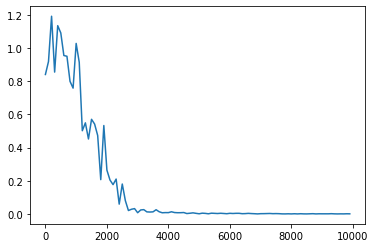

In [12]:
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

binary_dim = 8 #2進数桁数

largest_number = pow(2, binary_dim)

binary = np.unpackbits(np.array([range(largest_number)], dtype = np.uint8).T, axis=1) #最大までの2進数を準備

input_layer_size = 2 #入力層サイズ
hidden_layer_size = 16 #中間層サイズ
output_layer_size = 1 #出力（2進数が出力）

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

W_in = weight_init_std * np.random.randn(input_layer_size, hidden_layer_size)
W_out = weight_init_std * np.random.randn(hidden_layer_size, output_layer_size)
W = weight_init_std * np.random.randn(hidden_layer_size, hidden_layer_size)

# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []


for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int] #足し算の正解のバイナリ
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1) #[-t-1]で一桁目から取り出している
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]]) #正解データの一桁目から順番に取り出す
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
#         z[:,t+1] = functions.relu(u[:,t+1])
#         z[:,t+1] = np.tanh(u[:,t+1])    
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.mean_squared_error(dd, y[:,t])
        
        delta_out[:,t] = functions.d_mean_squared_error(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_relu(u[:,t+1])
#         delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])    

        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()

## Tensorflowによる実装

文章を入力した後、次に続く単語を予測するモデル。
元のプログラムを改変して、確率の高い5個の単語だけ出力するようにした。
etが72.9%の予測確率となっている。

In [67]:
import tensorflow as tf
import numpy as np
import re
import glob
import collections
import random
import pickle
import time
import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# logging levelを変更
tf.logging.set_verbosity(tf.logging.ERROR)

class Corpus:
    def __init__(self):
        self.unknown_word_symbol = "<???>" # 出現回数の少ない単語は未知語として定義しておく
        self.unknown_word_threshold = 3 # 未知語と定義する単語の出現回数の閾値
        self.corpus_file = "./corpus/**/*.txt"
        self.corpus_encoding = "utf-8"
        self.dictionary_filename = "./data_for_predict/word_dict.dic"
        self.chunk_size = 5
        self.load_dict()
  
        words = []
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:

                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [ word for word in text.split() if not word.startswith("-")]

        
        self.data_n = len(words) - self.chunk_size
        self.data = self.seq_to_matrix(words)
        

    def prepare_data(self):
        """
        訓練データとテストデータを準備する。
        data_n = ( text データの総単語数 ) - chunk_size
        input: (data_n, chunk_size, vocabulary_size)
        output: (data_n, vocabulary_size)
        """

        # 入力と出力の次元テンソルを準備
        all_input = np.zeros([self.chunk_size, self.vocabulary_size, self.data_n])
        all_output = np.zeros([self.vocabulary_size, self.data_n])

        # 準備したテンソルに、コーパスの one-hot 表現(self.data) のデータを埋めていく
        # i 番目から ( i + chunk_size - 1 ) 番目までの単語が１組の入力となる
        # このときの出力は ( i + chunk_size ) 番目の単語
        for i in range(self.data_n):
            all_output[:, i] = self.data[:, i + self.chunk_size] # (i + chunk_size) 番目の単語の one-hot ベクトル
            for j in range(self.chunk_size):
                all_input[j, :, i] = self.data[:, i + self.chunk_size - j - 1]

        # 後に使うデータ形式に合わせるために転置を取る
        all_input = all_input.transpose([2, 0, 1])
        all_output = all_output.transpose()

        # 訓練データ：テストデータを 4 : 1 に分割する
        training_num = ( self.data_n * 4 ) // 5
        return all_input[:training_num], all_output[:training_num], all_input[training_num:], all_output[training_num:]


    def build_dict(self):
        # コーパス全体を見て、単語の出現回数をカウントする
        counter = collections.Counter()
        for filename in glob.glob(self.corpus_file, recursive=True):
            with open(filename, "r", encoding=self.corpus_encoding) as f:

                # word breaking
                text = f.read()
                # 全ての文字を小文字に統一し、改行をスペースに変換
                text = text.lower().replace("\n", " ")
                # 特定の文字以外の文字を空文字に置換する
                text = re.sub(r"[^a-z '\-]", "", text)
                # 複数のスペースはスペース一文字に変換
                text = re.sub(r"[ ]+", " ", text)

                # 前処理： '-' で始まる単語は無視する
                words = [word for word in text.split() if not word.startswith("-")]

                counter.update(words)

        # 出現頻度の低い単語を一つの記号にまとめる
        word_id = 0
        dictionary = {}
        for word, count in counter.items():
            if count <= self.unknown_word_threshold:
                continue

            dictionary[word] = word_id
            word_id += 1
        dictionary[self.unknown_word_symbol] = word_id

        print("総単語数：", len(dictionary))

        # 辞書を pickle を使って保存しておく
        with open(self.dictionary_filename, "wb") as f:
            pickle.dump(dictionary, f)
            print("Dictionary is saved to", self.dictionary_filename)

        self.dictionary = dictionary

        print(self.dictionary)

    def load_dict(self):
        with open(self.dictionary_filename, "rb") as f:
            self.dictionary = pickle.load(f)
            self.vocabulary_size = len(self.dictionary)
            self.input_layer_size = len(self.dictionary)
            self.output_layer_size = len(self.dictionary)
            print("総単語数: ", self.input_layer_size)
        

    def get_word_id(self, word):
        # print(word)
        # print(self.dictionary)
        # print(self.unknown_word_symbol)
        # print(self.dictionary[self.unknown_word_symbol])
        # print(self.dictionary.get(word, self.dictionary[self.unknown_word_symbol]))
        return self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])

    # 入力された単語を one-hot ベクトルにする
    def to_one_hot(self, word):
        index = self.get_word_id(word)
        data = np.zeros(self.vocabulary_size)
        data[index] = 1
        return data

    def seq_to_matrix(self, seq):
        #print(seq)
        data = np.array([self.to_one_hot(word) for word in seq]) # (data_n, vocabulary_size)
        return data.transpose() # (vocabulary_size, data_n)

class Language:
    """
    input layer: self.vocabulary_size
    hidden layer: rnn_size = 30
    output layer: self.vocabulary_size
    """

    def __init__(self):
        self.corpus = Corpus()
        self.dictionary = self.corpus.dictionary
        self.vocabulary_size = len(self.dictionary) # 単語数
        self.input_layer_size = self.vocabulary_size # 入力層の数
        self.hidden_layer_size = 30 # 隠れ層の RNN ユニットの数
        self.output_layer_size = self.vocabulary_size # 出力層の数
        self.batch_size = 128 # バッチサイズ
        self.chunk_size = 5 # 展開するシーケンスの数。c_0, c_1, ..., c_(chunk_size - 1) を入力し、c_(chunk_size) 番目の単語の確率が出力される。
        self.learning_rate = 0.005 # 学習率
        self.epochs = 1000 # 学習するエポック数
        self.forget_bias = 1.0 # LSTM における忘却ゲートのバイアス
        self.model_filename = "./data_for_predict/predict_model.ckpt"
        self.unknown_word_symbol = self.corpus.unknown_word_symbol

    def inference(self, input_data, initial_state):
        """
        :param input_data: (batch_size, chunk_size, vocabulary_size) 次元のテンソル
        :param initial_state: (batch_size, hidden_layer_size) 次元の行列
        :return:
        """
        # 重みとバイアスの初期化
        hidden_w = tf.Variable(tf.truncated_normal([self.input_layer_size, self.hidden_layer_size], stddev=0.01))
        hidden_b = tf.Variable(tf.ones([self.hidden_layer_size]))
        output_w = tf.Variable(tf.truncated_normal([self.hidden_layer_size, self.output_layer_size], stddev=0.01))
        output_b = tf.Variable(tf.ones([self.output_layer_size]))

        # BasicLSTMCell, BasicRNNCell は (batch_size, hidden_layer_size) が chunk_size 数ぶんつながったリストを入力とする。
        # 現時点での入力データは (batch_size, chunk_size, input_layer_size) という３次元のテンソルなので
        # tf.transpose や tf.reshape などを駆使してテンソルのサイズを調整する。

        input_data = tf.transpose(input_data, [1, 0, 2]) # 転置。(chunk_size, batch_size, vocabulary_size)
        input_data = tf.reshape(input_data, [-1, self.input_layer_size]) # 変形。(chunk_size * batch_size, input_layer_size)
        input_data = tf.matmul(input_data, hidden_w) + hidden_b # 重みWとバイアスBを適用。 (chunk_size, batch_size, hidden_layer_size)
        input_data = tf.split(input_data, self.chunk_size, 0) # リストに分割。chunk_size * (batch_size, hidden_layer_size)

        # RNN のセルを定義する。RNN Cell の他に LSTM のセルや GRU のセルなどが利用できる。
        cell = tf.nn.rnn_cell.BasicRNNCell(self.hidden_layer_size)
        outputs, states = tf.nn.static_rnn(cell, input_data, initial_state=initial_state)
        
        # 最後に隠れ層から出力層につながる重みとバイアスを処理する
        # 最終的に softmax 関数で処理し、確率として解釈される。
        # softmax 関数はこの関数の外で定義する。
        output = tf.matmul(outputs[-1], output_w) + output_b

        return output

    def loss(self, logits, labels):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

        return cost

    def training(self, cost):
        # 今回は最適化手法として Adam を選択する。
        # ここの AdamOptimizer の部分を変えることで、Adagrad, Adadelta などの他の最適化手法を選択することができる
        optimizer = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(cost)

        return optimizer

    def train(self):
        # 変数などの用意
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        actual_labels = tf.placeholder("float", [None, self.output_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])

        prediction = self.inference(input_data, initial_state)
        cost = self.loss(prediction, actual_labels)
        optimizer = self.training(cost)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(actual_labels, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

        # TensorBoard で可視化するため、クロスエントロピーをサマリーに追加
        tf.summary.scalar("Cross entropy: ", cost)
        summary = tf.summary.merge_all()

        # 訓練・テストデータの用意
        # corpus = Corpus()
        trX, trY, teX, teY = self.corpus.prepare_data()
        training_num = trX.shape[0]

        # ログを保存するためのディレクトリ
        timestamp = time.time()
        dirname = datetime.datetime.fromtimestamp(timestamp).strftime("%Y%m%d%H%M%S")

        # ここから実際に学習を走らせる
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            summary_writer = tf.summary.FileWriter("./log/" + dirname, sess.graph)

            # エポックを回す
            for epoch in range(self.epochs):
                step = 0
                epoch_loss = 0
                epoch_acc = 0

                # 訓練データをバッチサイズごとに分けて学習させる (= optimizer を走らせる)
                # エポックごとの損失関数の合計値や（訓練データに対する）精度も計算しておく
                while (step + 1) * self.batch_size < training_num:
                    start_idx = step * self.batch_size
                    end_idx = (step + 1) * self.batch_size

                    batch_xs = trX[start_idx:end_idx, :, :]
                    batch_ys = trY[start_idx:end_idx, :]

                    _, c, a = sess.run([optimizer, cost, accuracy],
                                       feed_dict={input_data: batch_xs,
                                                  actual_labels: batch_ys,
                                                  initial_state: np.zeros([self.batch_size, self.hidden_layer_size])
                                                  }
                                       )
                    epoch_loss += c
                    epoch_acc += a
                    step += 1

                # コンソールに損失関数の値や精度を出力しておく
                print("Epoch", epoch, "completed ouf of", self.epochs, "-- loss:", epoch_loss, " -- accuracy:",
                      epoch_acc / step)

                # Epochが終わるごとにTensorBoard用に値を保存
                summary_str = sess.run(summary, feed_dict={input_data: trX,
                                                           actual_labels: trY,
                                                           initial_state: np.zeros(
                                                               [trX.shape[0],
                                                                self.hidden_layer_size]
                                                           )
                                                           }
                                       )
                summary_writer.add_summary(summary_str, epoch)
                summary_writer.flush()

            # 学習したモデルも保存しておく
            saver = tf.train.Saver()
            saver.save(sess, self.model_filename)

            # 最後にテストデータでの精度を計算して表示する
            a = sess.run(accuracy, feed_dict={input_data: teX, actual_labels: teY,
                                              initial_state: np.zeros([teX.shape[0], self.hidden_layer_size])})
            print("Accuracy on test:", a)


    def predict(self, seq):
        """
        文章を入力したときに次に来る単語を予測する
        :param seq: 予測したい単語の直前の文字列。chunk_size 以上の単語数が必要。
        :return:
        """

        # 最初に復元したい変数をすべて定義してしまいます
        tf.reset_default_graph()
        input_data = tf.placeholder("float", [None, self.chunk_size, self.input_layer_size])
        initial_state = tf.placeholder("float", [None, self.hidden_layer_size])
        prediction = tf.nn.softmax(self.inference(input_data, initial_state))
        predicted_labels = tf.argmax(prediction, 1)

        # 入力データの作成
        # seq を one-hot 表現に変換する。
        words = [word for word in seq.split() if not word.startswith("-")]
        x = np.zeros([1, self.chunk_size, self.input_layer_size])
        for i in range(self.chunk_size):
            word = seq[len(words) - self.chunk_size + i]
            index = self.dictionary.get(word, self.dictionary[self.unknown_word_symbol])
            x[0][i][index] = 1
        feed_dict = {
            input_data: x, # (1, chunk_size, vocabulary_size)
            initial_state: np.zeros([1, self.hidden_layer_size])
        }

        # tf.Session()を用意
        with tf.Session() as sess:
            # 保存したモデルをロードする。ロード前にすべての変数を用意しておく必要がある。
            saver = tf.train.Saver()
            saver.restore(sess, self.model_filename)

            # ロードしたモデルを使って予測結果を計算
            u, v = sess.run([prediction, predicted_labels], feed_dict=feed_dict)

            keys = list(self.dictionary.keys())
            
            
            p_dict = {}


            # コンソールに文字ごとの確率を表示
            for i in range(self.vocabulary_size):
                c = self.unknown_word_symbol if i == (self.vocabulary_size - 1) else keys[i]
                #print(c, ":", u[0][i])
                p_dict[c] = u[0][i]
            sorted_p_dict = sorted(p_dict.items(), key = lambda x : x[1])
            print(sorted_p_dict[-5:])    

            print("Prediction:", seq + " " + ("<???>" if v[0] == (self.vocabulary_size - 1) else keys[v[0]]))

        return u[0]


def build_dict():
    cp = Corpus()
    cp.build_dict()

if __name__ == "__main__":
    #build_dict()

    ln = Language()

    # 学習するときに呼び出す
    #ln.train()

    # 保存したモデルを使って単語の予測をする
    ln.predict("some of them looks like")


総単語数:  9826
[('since', 0.003634915), ('measure', 0.012393582), ('each', 0.04577322), ('had', 0.20635906), ('et', 0.7297055)]
Prediction: some of them looks like et
